<a href="https://colab.research.google.com/github/mattdo40/Colab/blob/main/linear_and_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [302]:
  %matplotlib inline
  import matplotlib.pyplot as plt
  import math 
  import numpy as np 
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import classification_report
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split

# Linear Regression

In [303]:
Weights = [5, 2] # F(X) = 5x_0 + 2x_1
F = lambda W, X: sum([w*x for w,x in zip(W,X)])

dataX1 = range(-2, 11, 1)
dataX0 = [1]*len(dataX1)

data = (list(zip(dataX0, dataX1)))
print (data)
Y = [F(Weights, X) for X in data]
print (Y)

[(1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]


In [304]:
TrainingData1 = zip(data, Y)

print (list(TrainingData1))


[((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]


In [305]:
data = [((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]
print(data)
X = [d for d,_ in data]
Y = [y for _, y in data]
print(X)
print(Y)

[((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]
[(1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]


In [306]:
alpha=0.01
model=[0, 0]
Errors = []

In [307]:
# Calculate Predicted

yPredicted = [F(model, x) for x in X]
print(yPredicted)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [308]:
# Evaluate Model
Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
print("With Model=", model, "Error=", Error)
Errors.append([model, Error])
print ("History w/ Alpha=", alpha, "=")
print (Errors)
print("Next")
for i in range(len(Errors)):
  print("Iterations=",i+1,":=",Errors[i])

With Model= [0, 0] Error= 2925.0
History w/ Alpha= 0.01 =
[[[0, 0], 2925.0]]
Next
Iterations= 1 := [[0, 0], 2925.0]


In [309]:
deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*x[1]) for r,y,x in zip(Y, yPredicted, X)] )

print(deltaX0)
print(deltaX1)

-26.0
-160.0


In [310]:
model = [model[0]-alpha*deltaX0, model[1]-alpha*deltaX1]
print(model)

[0.26, 1.6]


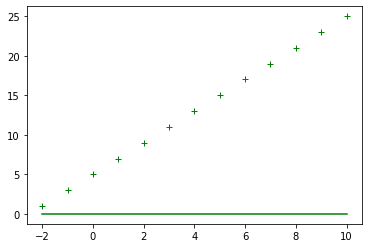

In [311]:
dataX1 = [x[1] for x, y in data]
plt.plot(dataX1, yPredicted, "g")
plt.plot(dataX1, Y, "g+")
plt.show()

[(((1, -2), 1), -11.7), (((1, -1), 3), 0.51), (((1, 0), 5), 17.12), (((1, 1), 7), 6.99), (((1, 2), 9), 18.32), (((1, 3), 11), 11.68), (((1, 4), 13), 13.63), (((1, 5), 15), 10.38), (((1, 6), 17), 11.24), (((1, 7), 19), 27.52), (((1, 8), 21), 21.34), (((1, 9), 23), 24.97), (((1, 10), 25), 17.12)]


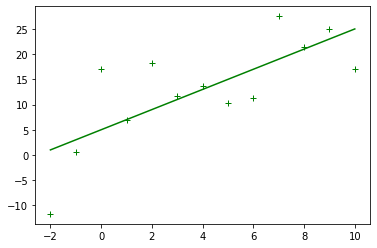

In [312]:
## Add Noise
import random
import numpy as np
EPS = 30
yNoise = [round(y+random.random()*EPS-EPS/2,2) for y in Y]
TrainingData2 = zip(data, yNoise)
print(list(TrainingData2))

plt.plot(dataX1, Y, "g")
plt.plot(dataX1, yNoise, "g+")
plt.show()

In [313]:
data = [((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]
print(data)
X = [d for d,_ in data]
Y = [y for _, y in data]
print(X)
print(Y)

[((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]
[(1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]
[6.39, 16.51, -3.11, 10.79, 11.62, 23.24, 18.27, 27.58, 22.21, 5.12, 8.86, 10.69, 14.82]


In [314]:
alpha=0.02
model=[0, 0]
Errors = []

In [315]:
# Calculate Predicted

yPredicted = [F(model, x) for x in X]
print(yPredicted)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [316]:
# Evaluate Model
Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
print("With Model=", model, "Error=", Error)
Errors.append([model, Error])
print ("History w/ Alpha=", alpha, "=")
print (Errors)
print("Next")
for i in range(len(Errors)):
  print("Iterations=",i+1,":=",Errors[i])

With Model= [0, 0] Error= 3140.9862999999996
History w/ Alpha= 0.02 =
[[[0, 0], 3140.9862999999996]]
Next
Iterations= 1 := [[0, 0], 3140.9862999999996]


In [317]:
deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*x[1]) for r,y,x in zip(Y, yPredicted, X)] )

print(deltaX0)
print(deltaX1)

-26.613846153846158
-118.4353846153846


In [318]:
model = [model[0]-alpha*deltaX0, model[1]-alpha*deltaX1]
print(model)

[0.5322769230769232, 2.368707692307692]


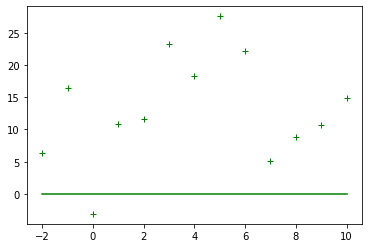

In [319]:
dataX1 = [x[1] for x, y in data]
plt.plot(dataX1, yPredicted, "g")
plt.plot(dataX1, Y, "g+")
plt.show()

## Defining Sigmoid 

In [320]:
sigmoid = lambda y: 1/(1+math.exp(-y)) #from logistic regression jupyter notebook
classify = lambda y: 1 if y>0.5 else 0
F = lambda W, X: sum([w*x for w,x in zip(W,X)])

data = [((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]

X = [(d[0], d[1], d[2]) for d,_ in data]
Y = [y for _, y in data]

## Training Set 1

In [321]:
data = [((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]


## Data Visualisation

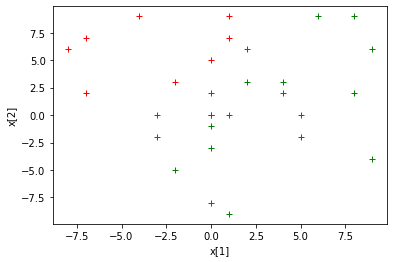

In [322]:
X = [x for (x,r) in data]
R = [r for (x,r) in data]

xNeg = [x for (x,r) in data if r == 0] 
xPos = [x for (x,r) in data if r != 0] 

x1P = [x[1] for x in xPos]
x2P = [x[2] for x in xPos]
x1N = [x[1] for x in xNeg]
x2N = [x[2] for x in xNeg]

plt.xlabel("x[1]")
plt.ylabel("x[2]")
plt.plot(x1P, x2P, "g+") 
plt.plot(x1N, x2N, "r+") 
plt.show()

In [323]:
alpha = 0.01
model = [0.001, 0.001, 0.001] #demonstrated in class i think

X = [x for (x,r) in data]
R = [r for (x,r) in data]

In [324]:
def LogisticRegression(alpha, model, X, R, iter): # from class lecture slide
  dim = len(X[0]) # pretty sure this was asked/described in class
  N = len(X) 
  for i in range(iter):
    dW = [0]*dim
    for j in range(N): 
      yPredicted = sigmoid(F(model, X[j])) 
      for k in range(dim): 
        dW[k] += -2 * (R[j] - yPredicted)*(yPredicted)*(1 - yPredicted)*X[j][k] 
    for k in range(dim): 
      model[k] = model[k] - (1/N)*alpha*dW[k] 
  return model

In [325]:
model = LogisticRegression(alpha, model, X, R, 100)


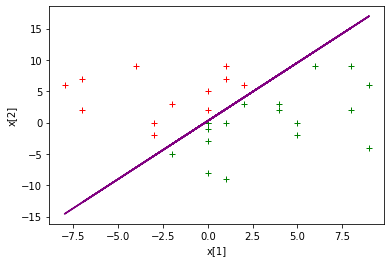

In [326]:
X = [x for (x,r) in data] 
R = [r for (x,r) in data]

xNeg = [x for (x,r) in data if r == 0] 
xPos = [x for (x,r) in data if r != 0] 

x1P = [x[1] for x in xPos]
x1N = [x[1] for x in xNeg]
x2P = [x[2] for x in xPos]
x2N = [x[2] for x in xNeg]

F= lambda model, X1: [(-model[0]/model[2]) - (model[1]/model[2]) * x1 for x1 in X1]
modelX1 = [x[1] for x in X]
modelX2 = F(model, modelX1)

plt.xlabel("x[1]")
plt.ylabel("x[2]")
plt.plot(x1P, x2P, "g+") 
plt.plot(x1N, x2N, "r+")
plt.plot(modelX1, modelX2,"purple")
plt.show()

## Training Set 2

In [327]:
sigmoid = lambda y: 1/(1+math.exp(-y)) #i have to do this for all the training sets because i get a unary operator error if i don't  
classify = lambda y: 1 if y>0.5 else 0
F = lambda W, X: sum([w*x for w,x in zip(W,X)])

data = [((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]

X = [(d[0], d[1], d[2]) for d,_ in data]
Y = [y for _, y in data]

In [328]:
data = [((1, 0, 0), 0), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 0), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 1), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]


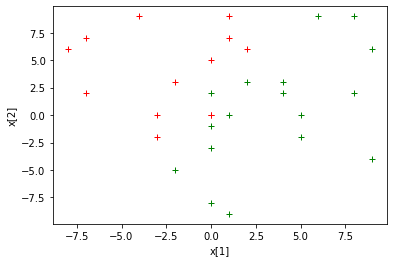

In [329]:
X = [x for (x,r) in data]
R = [r for (x,r) in data]

xNeg = [x for (x,r) in data if r == 0] 
xPos = [x for (x,r) in data if r != 0] 

x1P = [x[1] for x in xPos]
x1N = [x[1] for x in xNeg]
x2P = [x[2] for x in xPos]
x2N = [x[2] for x in xNeg]

plt.xlabel("x[1]")
plt.ylabel("x[2]")
plt.plot(x1P, x2P, "g+") 
plt.plot(x1N, x2N, "r+")
plt.show()

In [330]:
alpha = 0.01
model = [0.001, 0.001, 0.001] 
X = [x for (x,r) in data]
R = [r for (x,r) in data]

In [331]:
model = LogisticRegression(alpha, model, X, R, 100)

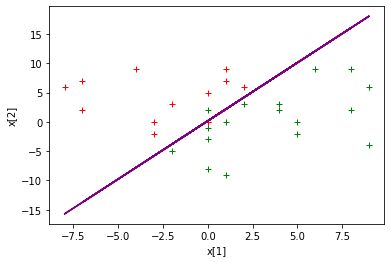

In [332]:
X = [x for (x,r) in data] 
R = [r for (x,r) in data]

xNeg = [x for (x,r) in data if r == 0] 
xPos = [x for (x,r) in data if r != 0] 

x1P = [x[1] for x in xPos]
x1N = [x[1] for x in xNeg]
x2P = [x[2] for x in xPos]
x2N = [x[2] for x in xNeg]

F= lambda model, X1: [(-model[0]/model[2]) - (model[1]/model[2]) * x1 for x1 in X1]
modelX1 = [x[1] for x in X]
modelX2 = F(model, modelX1)

plt.xlabel("x[1]")
plt.ylabel("x[2]")
plt.plot(x1P, x2P, "g+") #changes 1 or 2 to green
plt.plot(x1N, x2N, "r+")
plt.plot(modelX1, modelX2,"purple")
plt.show()

## Training Set 3

In [333]:
sigmoid = lambda y: 1/(1+math.exp(-y))
classify = lambda y: 1 if y>0.5 else 0
F = lambda W, X: sum([w*x for w,x in zip(W,X)])

data = [((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]

X = [(d[0], d[1], d[2]) for d,_ in data]
Y = [y for _, y in data]

In [334]:
data = [((1, 2, 7), 0), ((1, 19, 72), 0), ((1, -39, -20), 0), ((1, 86, 95), 1), ((1, 45, 37), 1), ((1, 52, -23), 1), ((1, -8, -8), 0), ((1, 67, 93), 1), ((1, 46, 21), 1), ((1, 18, -97), 1), ((1, -78, 70), 0), ((1, -9, -17), 1), ((1, 94, -40), 1), ((1, 11, -3), 1), ((1, -24, -59), 1), ((1, 25, 33), 1), ((1, -71, 23), 0), ((1, -34, -7), 0), ((1, 55, -3), 1), ((1, -5, -33), 1), ((1, -22, 38), 0), ((1, 94, 66), 1), ((1, 4, -89), 1), ((1, -9, 26), 0), ((1, -83, 61), 0), ((1, 19, 98), 0), ((1, -1, 55), 0), ((1, -43, 90), 0), ((1, 86, 27), 1), ((1, 24, 69), 0)]


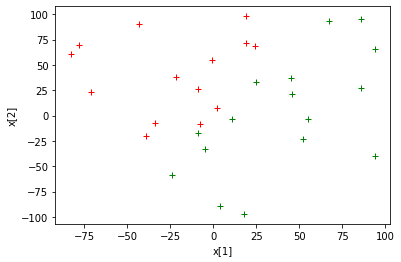

In [335]:
X = [x for (x,r) in data]
R = [r for (x,r) in data]

xNeg = [x for (x,r) in data if r == 0] 
xPos = [x for (x,r) in data if r != 0] 

x1P = [x[1] for x in xPos]
x1N = [x[1] for x in xNeg]
x2P = [x[2] for x in xPos]
x2N = [x[2] for x in xNeg]

plt.xlabel("x[1]")
plt.ylabel("x[2]")
plt.plot(x1P, x2P, "g+") 
plt.plot(x1N, x2N, "r+")
plt.show()

In [336]:
model = LogisticRegression(alpha, model, X, R, 100) #chnage number of iterations here

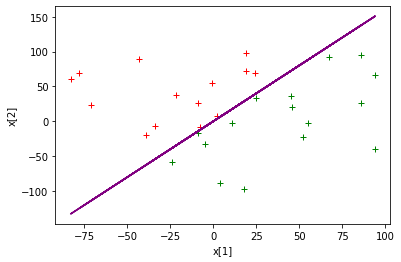

In [337]:
X = [x for (x,r) in data] 
R = [r for (x,r) in data]

xNeg = [x for (x,r) in data if r == 0] 
xPos = [x for (x,r) in data if r != 0] 

x1P = [x[1] for x in xPos]
x1N = [x[1] for x in xNeg]
x2P = [x[2] for x in xPos]
x2N = [x[2] for x in xNeg]

F= lambda model, X1: [(-model[0]/model[2]) - (model[1]/model[2]) * x1 for x1 in X1]
modelX1 = [x[1] for x in X]
modelX2 = F(model, modelX1)

plt.xlabel("x[1]")
plt.ylabel("x[2]")
plt.plot(x1P, x2P, "g+") #changes 1 or 2 to green
plt.plot(x1N, x2N, "r+")
plt.plot(modelX1, modelX2,"purple")
plt.show()



## Training Set 4
0 vs 1 or 2

In [338]:
sigmoid = lambda y: 1/(1+math.exp(-y))
classify = lambda y: 1 if y>0.5 else 0
F = lambda W, X: sum([w*x for w,x in zip(W,X)])

data = [((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]

X = [(d[0], d[1], d[2]) for d,_ in data]
Y = [y for _, y in data]

In [339]:
data = [((1, 5.1, 3.5), 0), ((1, 4.9, 3.0), 0), ((1, 4.7, 3.2), 0), ((1, 4.6, 3.1), 0), ((1, 5.0, 3.6), 0), ((1, 5.4, 3.9), 0), ((1, 4.6, 3.4), 0), ((1, 5.0, 3.4), 0), ((1, 4.4, 2.9), 0), ((1, 4.9, 3.1), 0), ((1, 5.4, 3.7), 0), ((1, 4.8, 3.4), 0), ((1, 4.8, 3.0), 0), ((1, 4.3, 3.0), 0), ((1, 5.8, 4.0), 0), ((1, 5.7, 4.4), 0), ((1, 5.4, 3.9), 0), ((1, 5.1, 3.5), 0), ((1, 5.7, 3.8), 0), ((1, 5.1, 3.8), 0), ((1, 5.4, 3.4), 0), ((1, 5.1, 3.7), 0), ((1, 4.6, 3.6), 0), ((1, 5.1, 3.3), 0), ((1, 4.8, 3.4), 0), ((1, 5.0, 3.0), 0), ((1, 5.0, 3.4), 0), ((1, 5.2, 3.5), 0), ((1, 5.2, 3.4), 0), ((1, 4.7, 3.2), 0), ((1, 4.8, 3.1), 0), ((1, 5.4, 3.4), 0), ((1, 5.2, 4.1), 0), ((1, 5.5, 4.2), 0), ((1, 4.9, 3.1), 0), ((1, 5.0, 3.2), 0), ((1, 5.5, 3.5), 0), ((1, 4.9, 3.6), 0), ((1, 4.4, 3.0), 0), ((1, 5.1, 3.4), 0), ((1, 5.0, 3.5), 0), ((1, 4.5, 2.3), 0), ((1, 4.4, 3.2), 0), ((1, 5.0, 3.5), 0), ((1, 5.1, 3.8), 0), ((1, 4.8, 3.0), 0), ((1, 5.1, 3.8), 0), ((1, 4.6, 3.2), 0), ((1, 5.3, 3.7), 0), ((1, 5.0, 3.3), 0), ((1, 7.0, 3.2), 1), ((1, 6.4, 3.2), 1), ((1, 6.9, 3.1), 1), ((1, 5.5, 2.3), 1), ((1, 6.5, 2.8), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 1), ((1, 4.9, 2.4), 1), ((1, 6.6, 2.9), 1), ((1, 5.2, 2.7), 1), ((1, 5.0, 2.0), 1), ((1, 5.9, 3.0), 1), ((1, 6.0, 2.2), 1), ((1, 6.1, 2.9), 1), ((1, 5.6, 2.9), 1), ((1, 6.7, 3.1), 1), ((1, 5.6, 3.0), 1), ((1, 5.8, 2.7), 1), ((1, 6.2, 2.2), 1), ((1, 5.6, 2.5), 1), ((1, 5.9, 3.2), 1), ((1, 6.1, 2.8), 1), ((1, 6.3, 2.5), 1), ((1, 6.1, 2.8), 1), ((1, 6.4, 2.9), 1), ((1, 6.6, 3.0), 1), ((1, 6.8, 2.8), 1), ((1, 6.7, 3.0), 1), ((1, 6.0, 2.9), 1), ((1, 5.7, 2.6), 1), ((1, 5.5, 2.4), 1), ((1, 5.5, 2.4), 1), ((1, 5.8, 2.7), 1), ((1, 6.0, 2.7), 1), ((1, 5.4, 3.0), 1), ((1, 6.0, 3.4), 1), ((1, 6.7, 3.1), 1), ((1, 6.3, 2.3), 1), ((1, 5.6, 3.0), 1), ((1, 5.5, 2.5), 1), ((1, 5.5, 2.6), 1), ((1, 6.1, 3.0), 1), ((1, 5.8, 2.6), 1), ((1, 5.0, 2.3), 1), ((1, 5.6, 2.7), 1), ((1, 5.7, 3.0), 1), ((1, 5.7, 2.9), 1), ((1, 6.2, 2.9), 1), ((1, 5.1, 2.5), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 2), ((1, 5.8, 2.7), 2), ((1, 7.1, 3.0), 2), ((1, 6.3, 2.9), 2), ((1, 6.5, 3.0), 2), ((1, 7.6, 3.0), 2), ((1, 4.9, 2.5), 2), ((1, 7.3, 2.9), 2), ((1, 6.7, 2.5), 2), ((1, 7.2, 3.6), 2), ((1, 6.5, 3.2), 2), ((1, 6.4, 2.7), 2), ((1, 6.8, 3.0), 2), ((1, 5.7, 2.5), 2), ((1, 5.8, 2.8), 2), ((1, 6.4, 3.2), 2), ((1, 6.5, 3.0), 2), ((1, 7.7, 3.8), 2), ((1, 7.7, 2.6), 2), ((1, 6.0, 2.2), 2), ((1, 6.9, 3.2), 2), ((1, 5.6, 2.8), 2), ((1, 7.7, 2.8), 2), ((1, 6.3, 2.7), 2), ((1, 6.7, 3.3), 2), ((1, 7.2, 3.2), 2), ((1, 6.2, 2.8), 2), ((1, 6.1, 3.0), 2), ((1, 6.4, 2.8), 2), ((1, 7.2, 3.0), 2), ((1, 7.4, 2.8), 2), ((1, 7.9, 3.8), 2), ((1, 6.4, 2.8), 2), ((1, 6.3, 2.8), 2), ((1, 6.1, 2.6), 2), ((1, 7.7, 3.0), 2), ((1, 6.3, 3.4), 2), ((1, 6.4, 3.1), 2), ((1, 6.0, 3.0), 2), ((1, 6.9, 3.1), 2), ((1, 6.7, 3.1), 2), ((1, 6.9, 3.1), 2), ((1, 5.8, 2.7), 2), ((1, 6.8, 3.2), 2), ((1, 6.7, 3.3), 2), ((1, 6.7, 3.0), 2), ((1, 6.3, 2.5), 2), ((1, 6.5, 3.0), 2), ((1, 6.2, 3.4), 2), ((1, 5.9, 3.0), 2)]


have to change data visualization cause of 2

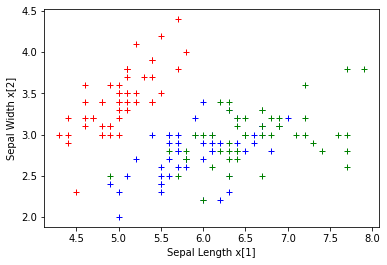

In [340]:
length0 = [(d[1]) for d,_ in (x for x in data if ((x[1])==0))]
width0= [(y[2]) for y,_ in (x for x in data if ((x[1])==0))]
plt.plot(length0, width0,"r+")

length1 = [(d[1]) for d,_ in (x for x in data if ((x[1])==1))]
width1 = [(y[2]) for y,_ in (x for x in data if ((x[1])==1))]
plt.plot(length1, width1,"b+")

length2 = [(d[1]) for d,_ in (x for x in data if ((x[1])==2))]
width2 = [(y[2]) for y,_ in (x for x in data if ((x[1])==2))]
plt.plot(length2, width2,"g+")

plt.xlabel("Sepal Length x[1]")
plt.ylabel("Sepal Width x[2]") 
plt.show()

In [341]:
alpha = 0.03 #changed alpha here for faster learning
model = [0.001, 0.001, 0.001] 
X = [x for (x,r) in data]
R = [r for (x,r) in data]

In [342]:
model = LogisticRegression(alpha, model, X, R, 10000) #increased number of iterations 

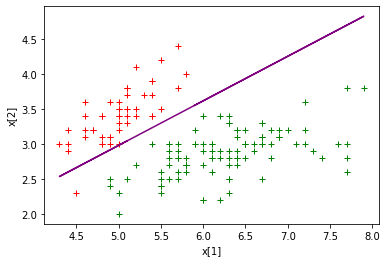

In [343]:
X = [x for (x,r) in data] 
R = [r for (x,r) in data]

xNeg = [x for (x,r) in data if r == 0] 
xPos = [x for (x,r) in data if r != 0] 

x1P = [x[1] for x in xPos]
x1N = [x[1] for x in xNeg]
x2P = [x[2] for x in xPos]
x2N = [x[2] for x in xNeg]

F= lambda model, X1: [(-model[0]/model[2]) - (model[1]/model[2]) * x1 for x1 in X1]
modelX1 = [x[1] for x in X]
modelX2 = F(model, modelX1)

plt.xlabel("x[1]")
plt.ylabel("x[2]")
plt.plot(x1P, x2P, "g+") #changes 1 or 2 to green
plt.plot(x1N, x2N, "r+")
plt.plot(modelX1, modelX2,"purple")
plt.show()

# Logistic Regression with binary classification

In [344]:
def F(W,X):
  return sum([w*x for w,x in zip(W,X)])

In [345]:
def sigmoid(x):
  return 1.0/(1+math.exp(-x))

In [346]:
def classify(model, X): 
  return [1 if sigmoid(F(model, x)) >= 0.5 else 0 for x in X] #in class we said that greater than 0.5 was 1

In [347]:
url = 'https://raw.githubusercontent.com/mattdo40/Colab/main/iris.data.csv'
data = pd.read_csv(url,names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [348]:
data = data.values.tolist() # Converting the dataframe into a normal list
print(data)

[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'], [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'], [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'], [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'], [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'], [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'], [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'], [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'], [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'], [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'], [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'], [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'], [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'], 

In [349]:
def LogisticRegressionSquaredError(alpha, model, data, iter): #defining logistic regression with squared error
  X = [x for (x,r) in data]
  R = [r for (x,r) in data]
  dim = len(X[0]) 
  N = len(X) 
  for i in range(iter):
    dW = [0]*dim
    for j in range(N): 
      yPredicted = sigmoid(F(model, X[j])) 
      for k in range(dim): 
        dW[k] += -2 * (R[j] - yPredicted)*(yPredicted)*(1 - yPredicted)*X[j][k] #
    for k in range(dim): 
      model[k] = model[k] - (1/N)*alpha*dW[k] 
  return model

In [350]:
def LogisticRegressionCrossEntropy(alpha, model, data, iter): #defining logistic regression with cross entropy
  X = [x for (x,r) in data]
  R = [r for (x,r) in data]
  dim = len(X[0]) 
  N = len(X) 
  for i in range(iter):
    dW = [0]*dim
    for j in range(N): 
      yPredicted = sigmoid(F(model, X[j])) 
      for k in range(dim): 
        dW[k] += -1 * (R[j] - yPredicted)*X[j][k] # derivation of logistic function
    for k in range(dim): 
      model[k] = model[k] - (1/N)*alpha*dW[k] 
  return model

In [351]:
alpha = 0.01
model = [0.01, 0.01, 0.01, 0.01, 0.01] # Initial model SE
model = [0.01, 0.01, 0.01, 0.01, 0.01] # Initial model CE
num_iter = 2000

Defining data sets 

In [352]:
datasetosa = [((1,x1,x2,x3,x4), Class) for (x1,x2,x3,x4, Class) in data] #convert to a tuple like we did for the training data
datasetosa = [(x,1) if Class == 'Iris-setosa' else (x,0) for (x,Class) in datasetosa] # set setosa to 1 anything else to 0

In [353]:
dataversicolor = [((1,x1,x2,x3,x4), Class) for (x1,x2,x3,x4, Class) in data] #convert to a tuple like we did for the training data
dataversicolor = [(x,1) if Class == 'Iris-versicolor' else (x,0) for (x,Class) in dataversicolor] # set versicolor to 1 anything else to 0

In [354]:
datavirginica = [((1,x1,x2,x3,x4), Class) for (x1,x2,x3,x4, Class) in data] #convert to a tuple like we did for the training data
datavirginica = [(x,1) if Class == 'Iris-virginica' else (x,0) for (x,Class) in datavirginica] # set virginica to 1 anything else to 0

Logistic Regression Squared Error

Setosa Squared Error

In [355]:
modelSetSE = LogisticRegressionSquaredError(alpha, model, datasetosa, num_iter)
print(modelSetSE) 

[0.14648842509139665, 0.21568817130673182, 0.7363640233435589, -1.1606068057651724, -0.5194312933456302]


Versicolor Squared Error

In [356]:
modelVerSE = LogisticRegressionSquaredError(alpha, model, dataversicolor, num_iter)
print(modelVerSE) 

[0.03480430804004951, 0.00033051785389654864, -0.3382062156808549, 0.1396931115291883, -0.1469963047234031]


Virginica Squared Error

In [357]:
modelVirSE = LogisticRegressionSquaredError(alpha, model, datavirginica, num_iter)
print(modelVirSE) 

[-0.2061859867173661, -0.5143542020597671, -0.7790203544807554, 0.9884128545759819, 0.5404103980763946]


Logistic Regression Cross Entropy

Setosa Cross Entropy

In [358]:
modelSetCE = LogisticRegressionCrossEntropy(alpha, model, datasetosa, num_iter)
print(modelSetCE) 

[0.19757400740849798, 0.3074416209194518, 1.188469703481715, -1.809379783707728, -0.7673136025218044]


Versicolor Cross Entropy

In [359]:
modelVerCE = LogisticRegressionCrossEntropy(alpha, model, dataversicolor, num_iter)
print(modelVerCE) 

[0.09395511735933702, 0.07346943169741767, -0.7596019984665219, 0.3602183527274698, -0.31469787473105143]


Virginica Cross Entropy

In [360]:
modelVirCE = LogisticRegressionCrossEntropy(alpha, model, datavirginica, num_iter)
print(modelVirCE) 

[-0.3175537308341662, -0.8330271114954716, -1.3856600061906579, 1.666734142565198, 0.8645610170788206]


# Logistic Regression using sklearn

In [361]:
data = sns.load_dataset("iris")

In [362]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

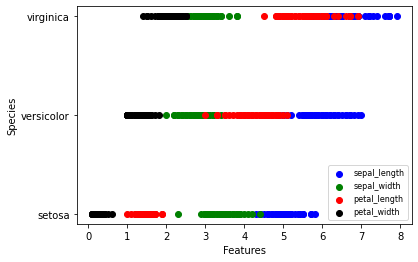

In [363]:
plt.xlabel('Features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

In [364]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [365]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

TypeError: ignored

In [ ]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))